In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')

In [113]:
def plot_svm(clf, X, y, title=None):
    plt.figure(figsize=(8,8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='bwr')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k',
               levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    plt.title(title)    
    plt.show()
    

In [114]:
def read_data(filename):
    encoder = LabelEncoder()
    encoder.fit(['P', 'N'])
    
    data = pd.read_csv(filename)
    X = data.drop('class', axis=1).to_numpy(dtype='float64')
    y = data['class'].to_numpy()
    y = encoder.transform(y)
    
    return X, y

In [115]:
def report(grid_cv, dataset, title=None):
    X, y = dataset
    grid_cv.fit(X, y)
    print(f'Best hyperparameters for {title}:', grid_cv.best_params_)
    print('F1-score:', grid_cv.best_score_)
    plot_svm(grid_cv.best_estimator_, X, y, title)

scorer = make_scorer(f1_score, average='macro')

In [116]:
chips = read_data('chips.csv')
geyser = read_data('geyser.csv')

## 1. Линейное ядро

In [117]:
grid_param = {
    "C": np.arange(0, 5, 0.2),
    "kernel": ["linear"]
}
grid_cv = GridSearchCV(
    SVC(),
    grid_param,
    n_jobs=-1,
    scoring=scorer,
    cv=LeaveOneOut()
)

Best hyperparameters for Chips (linear kernel): {'C': 1.0, 'kernel': 'linear'}
F1-score: 0.5
CPU times: user 929 ms, sys: 129 ms, total: 1.06 s
Wall time: 1.2 s


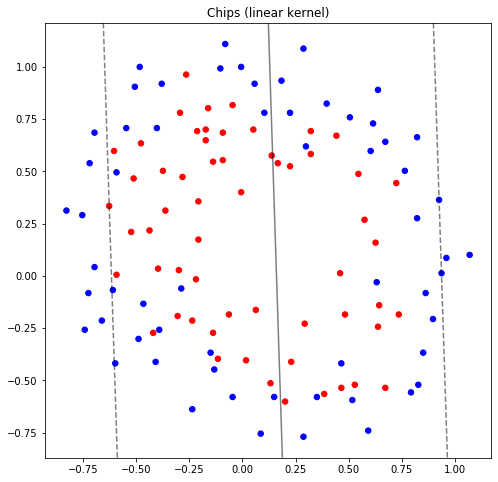

In [118]:
%%time

report(grid_cv, chips, 'Chips (linear kernel)')


Best hyperparameters for Geyser (linear kernel): {'C': 0.2, 'kernel': 'linear'}
F1-score: 0.9054054054054054
CPU times: user 1.8 s, sys: 156 ms, total: 1.96 s
Wall time: 3.4 s


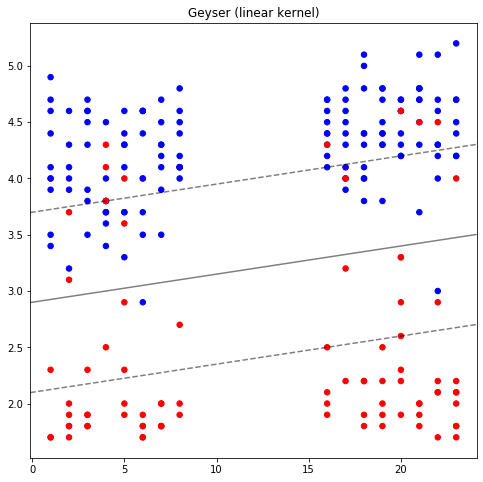

In [119]:
%%time

report(grid_cv, geyser, 'Geyser (linear kernel)')